# Homework 4
**Total Points: 5**

**Instructions:**
1. Complete parts 1 through 4, filling in code or responses where marked with `# YOUR CODE HERE` or `# YOUR ANALYSIS HERE`.
2. The libraries you need, in the order you need them, have already been coded. Do not import additional libraries or move import commands.
3. When finished, run the full notebook by selecting <b>Kernel > Restart & Run All</b>. </li>
4. Submit this completed notebook file to <b>NYU Classes</b>. </li>

This assignment contains a subfolder called `audio` which has 8 short audio files. You may use these files for your analysis.

**Grading:** Parts 1, 2 and 4 are worth 1 point. Part 3 is worth 2 points.

**Important Note**: The way you implement the code in your work for each assignment is entirely up to you. There are often many ways to solve a particular problem, so use whatever method works for you; the output is what is evaluated. The only requirement is that you follow the instructions, which may prohibit or require certain libraries or commands.



In [1]:
import numpy as np
import librosa
from librosa import feature
from matplotlib import pyplot as plt

# Imported to listen to the samples
from IPython.display import Audio

## Part 1: Feature Extraction
Create a function `extract_feature()` that will extract a chosen feature from an input audio signal. You may use Librosa for all feature extractions. When necessary, `hop_length` should be `win_length/2`.

In [2]:
def extract_feature(x, feature, win_length):
    
    """ 
    Calulate one of three different features from an input signal
    
    Parameters
    ----------
    
    x: np.array
        input audio
    
    feature: string
        One of the following: 'spec_cent', 'rms', or 'zcr'
    
    win_length: int
        window length, frame length, or n_fft
        
    Returns
    -------
    
    out: np.array
        vector of specified feature
        
    """
    
    if feature == 'spec_cent' : 
        spec_cent = librosa.feature.spectral_centroid( y = x , n_fft = win_length, win_length = win_length, hop_length = win_length // 2 )
        return spec_cent[0]
    
    elif feature == 'rms':
        rms = librosa.feature.rms( y = x , frame_length = win_length, hop_length = win_length // 2 )
        return rms[0]
    
    elif feature == 'zcr':
        zcr = librosa.feature.zero_crossing_rate(y = x, frame_length = win_length, hop_length = win_length // 2 )
        return zcr[0]
    
    else:
        return "Please specify featre: 'spec_cent', 'rms', or 'zcr'. "

## Part 2: Plot Features
Create a function `plot_features()` which will create a pyplot with 4 subplots arranged vertically. The top subplot should be the raw audio waveform and each lower subplot should one of the features from Part 1. Label everything correctly.
    

In [3]:
def plot_features(x, fs, win_length):
    
    """ Plot a an audio signal and 3 extracted features
    
    Parameters
    ----------
    
    x: np.array
        input audio
        
    fs: int
        sample rate
    
    win_length: int
        window length, frame length, or n_fft
    
        
    Returns
    -------
    
    none
        
    """
    
    plt.subplot(4, 1, 1)
    time = len(x) / fs
    time_vec = np.linspace(0, time, len(x))
    plt.title('Waveform')
    plt.xlabel('Time (seconds)')
    plt.plot(time_vec, x)
    
    plt.subplot(4, 1, 2)
    spec_cent = extract_feature(x, 'spec_cent', win_length)
    time_vec = np.linspace(0, time, len(spec_cent))
    plt.title('Spectral Centroid')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.plot(time_vec, spec_cent)
    
    plt.subplot(4, 1, 3)
    rms = extract_feature(x, 'rms', win_length)
    time_vec = np.linspace(0, time, len(rms))
    plt.title('RMS')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.plot(time_vec, rms)
    
    plt.subplot(4, 1, 4)
    zcr = extract_feature(x, 'zcr', win_length)
    time_vec = np.linspace(0, time, len(zcr))
    plt.title('ZCR')
    plt.xlabel('Time (seconds)')
    plt.plot(time_vec, zcr)
    
    
    plt.tight_layout()
    plt.show()
    
    return

## Part 3: MFCCs
Create a function `show_mfccs()` using the following process:

1. Generate a Spectrogram from the input signal.
2. Create a Mel filter.
3. Use the Mel filter to convert the Spectrogram to a Mel Spectrogram.
4. Convert the Mel Spectrogram to dB.
5. Generate a discrete cosine transform (DCT) filter.
6. Use the DCT to convert the Mel Spectrogram into MFCCs.
7. Use `imshow` to display the MFCCs.

You can use any function in Librosa that you want, except for `librosa.feature.mfcc()` and `librosa.feature_melspectrogram()`. All of these functions are available in Librosa, you just have to put the pieces together. Make sure the origin of the final MFCC image is on the bottom-left.

**Hint**: You will have to perform matrix multiplication twice in this function (steps 3 and 6). To multiply two matrices, the inner dimensions must match. For example, when multiplying $(a, b)$ with $(c, d)$ $b$ and $c$ have to be equal. You can check the shape of a matrix by using print(matrixName.shape). Use matrixName.T to transform the matrix if necessary to make the inner dimensions match. Use `np.matmul()` to perform the multiplication.

**This part is worth 2 points.**

In [4]:
""" Uncomment this function if you need it (from Librosa)

def dct(n_filters, n_input):
    basis = np.empty((n_filters, n_input))
    basis[0, :] = 1.0 / np.sqrt(n_input)

    samples = np.arange(1, 2*n_input, 2) * np.pi / (2.0 * n_input)

    for i in range(1, n_filters):
        basis[i, :] = np.cos(i*samples) * np.sqrt(2.0/n_input)

    return basis

"""

from librosa import filters
import scipy

def show_mfccs(x, fs, n_fft, n_mels, n_mfccs):
    
    """ Calculate and display MFCCs for an input audio signal
    
    Parameters
    ----------
    
    x: np.array
        input audio
    
    fs: int
        sample rate
    
    n_fft: int
        number of fft points (win_length)
        
    n_mels: int
         number of mel filters (try 40)
    
    n_mfccs: int
        number of mfcc coefficients (try 13)
      
    
    Returns
    -------
    
    none

    """
    # Generate a Spectrogram from the input signal.
    STFT = librosa.stft( x, n_fft = n_fft, hop_length = n_fft // 4 ) 
    STFT_mag = np.abs(STFT)
    
    # Create a Mel filter.
    mel_filter = filters.mel(fs, n_fft, n_mels)
    
    # Use the Mel filter to convert the Spectrogram to a Mel Spectrogram.
    mel_spec = mel_filter @ STFT_mag
    
    # Convert the Mel Spectrogram to dB.
    mel_spec_db = 10 * np.log( mel_spec + 0.0000001 )

    # Use the DCT to convert the Mel Spectrogram into MFCCs
    mfcc = scipy.fftpack.dct(mel_spec_db, axis=0)[:n_mfccs]
        
    # Plotting
    time_vec = np.linspace(0, len(x)/fs, mfcc.shape[1] + 1)
    y_vec = np.arange( mfcc.shape[0] + 1, dtype = np.int32 )
    plt.ylabel("Features")
    plt.xlabel("Time (seconds)")
    plt.title("MFCC")
    plt.pcolormesh( time_vec, y_vec, mfcc )
    plt.show()
    
    return


# Part 4: Analysis
Using your code in Parts 1 - 3 and the audio files in the `/audio` subfolder, report on the characteristics of the sound with regard to the features. What do the features tell you, and how do the features change over time? How might this information be exploited? In your analysis, include full plots (using `plot_features()` from Part 2. Also include at least 2 MFCC plots (from Part 3) and comment on their similarities or differences. Analyze at least 3 audio files.

## drums.aif

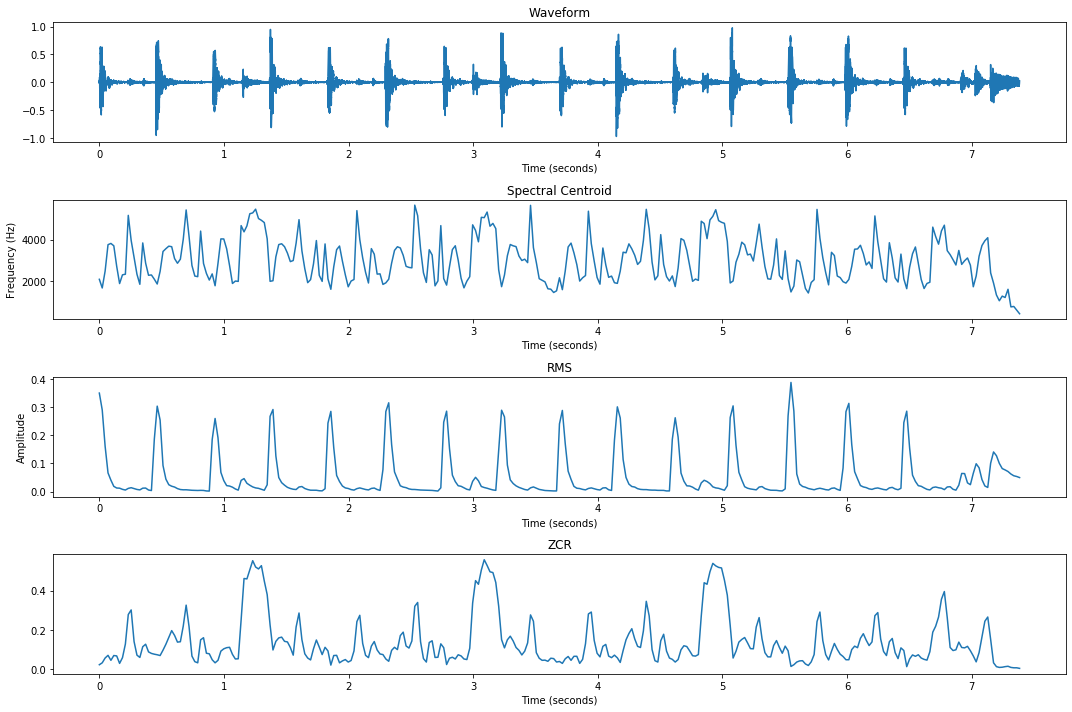

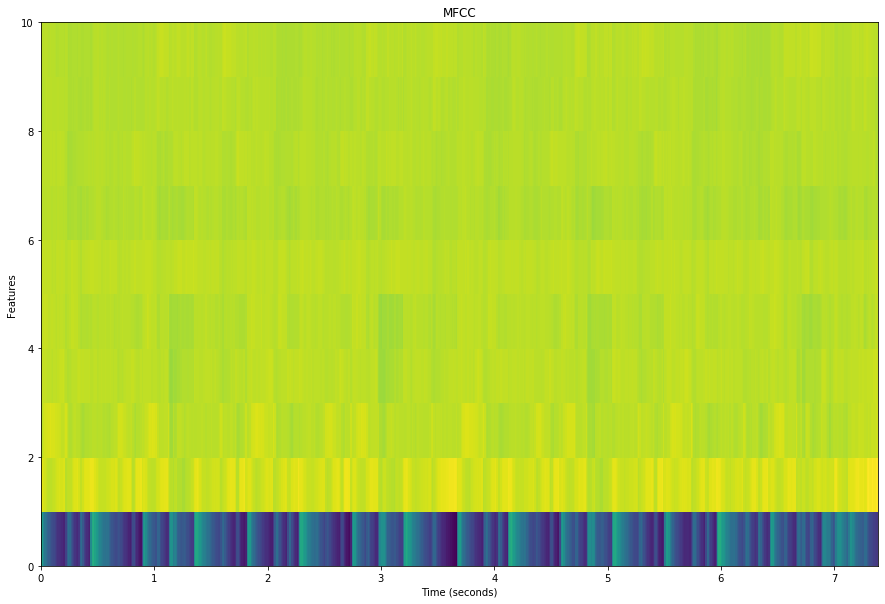

<Figure size 1080x720 with 0 Axes>

In [5]:
plt.rcParams['figure.figsize'] = (15, 10)

x, fs = librosa.load("audio/drums.aif")

# Plotting individual features
plot_features(x, fs, 1024)

# Plotting MFCCs
show_mfccs(x, fs, n_fft = 1024, n_mels = 40, n_mfccs = 10)
plt.tight_layout()

# Listening to the samples
Audio(data = x, rate = fs)

``
From the plots we can see that the onsets for kick and snare hits are clearly shown in the RMS plot. While there are certain periodicities in the ZCR plot, it's not as straightforward as the RMS plot.
``

``
The peaks in the Spectral Centroid plot does reveal more information about the hihats, and other percussive sounds. They can probably be extracted through further manipulations.
``

``
The bottom tile of the MFCC reveal clearly the onsets for many different components of the sounds (kick, snare, hats, etc.)
``

## voice.aif

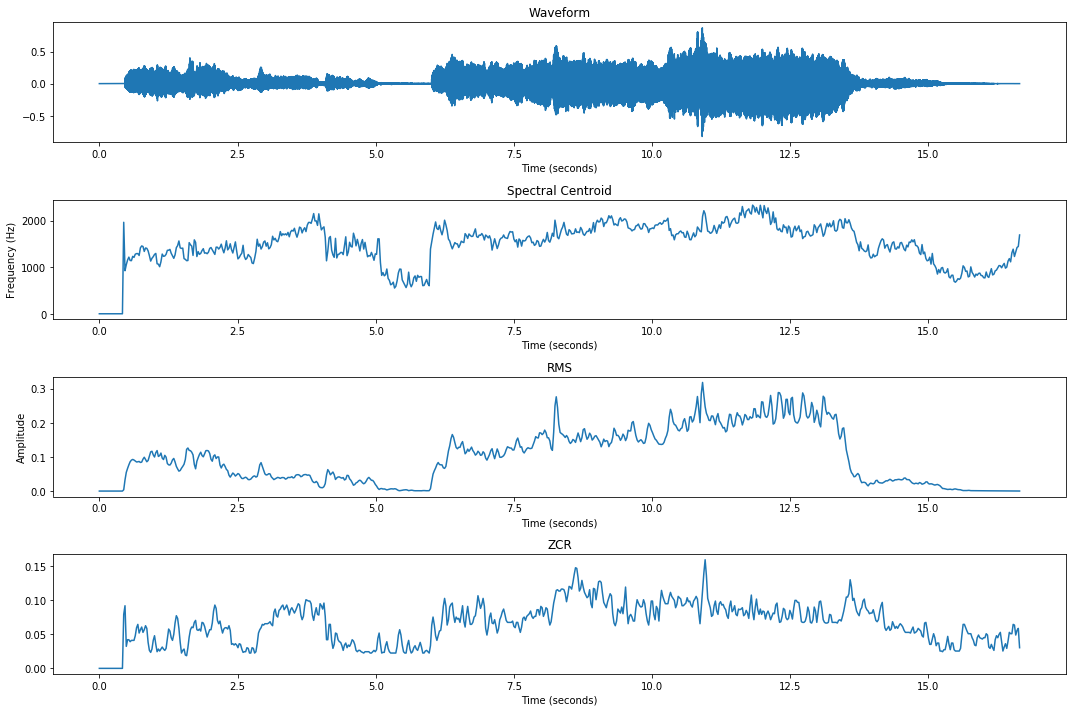

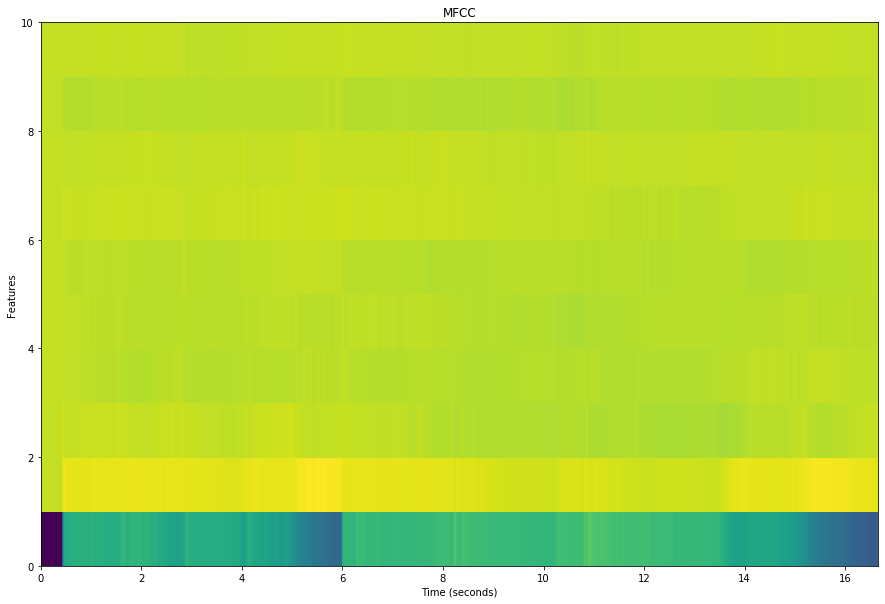

<Figure size 1080x720 with 0 Axes>

In [6]:
x, fs = librosa.load("audio/voice.aif")

# Plotting individual features
plot_features(x, fs, 1024)

# Plotting MFCCs
show_mfccs(x, fs, n_fft = 1024, n_mels = 40, n_mfccs = 10)
plt.tight_layout()

# Listening to the samples
Audio(data = x, rate = fs)

``
We see a similar trajectory in all feature plots. We can somewhat follow the direction of the pitches by looking at the Spectral Centroid plot.
``

``
It seems that Zero Crossing Rate didn't reveal much insightful knowledge as compared to other plots because the voice mainly consist of vowel vocalizations. 
``

``
Both Spectral Centroid and the RMS reveals changes in the intensity of the singing. 
``

## strings.aif

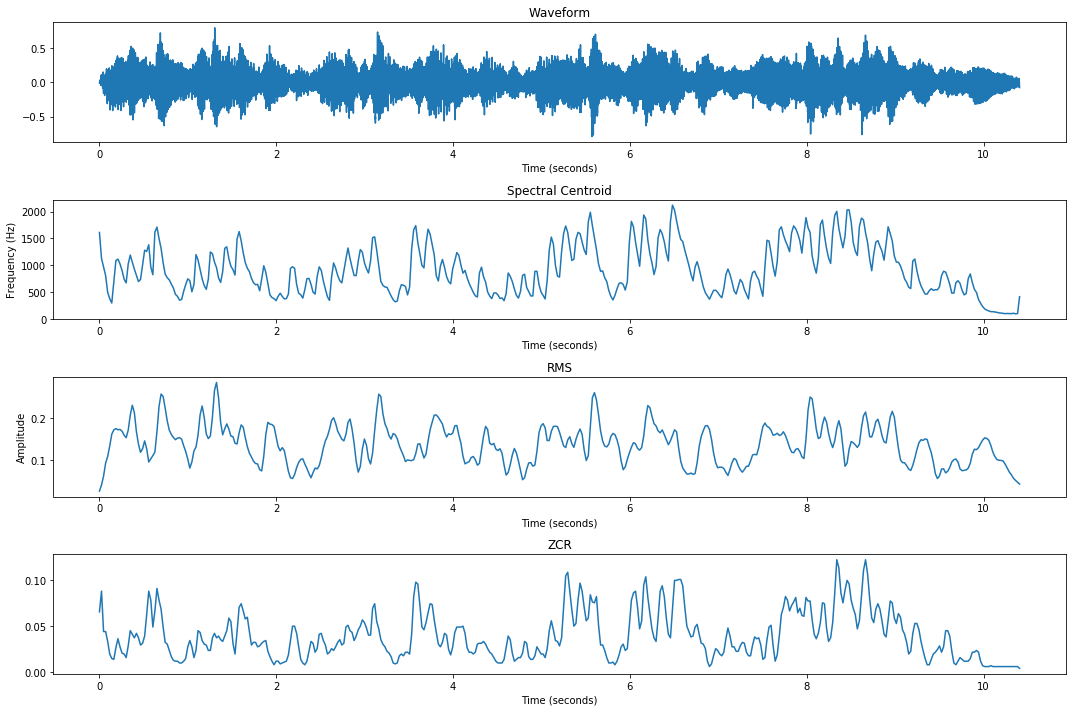

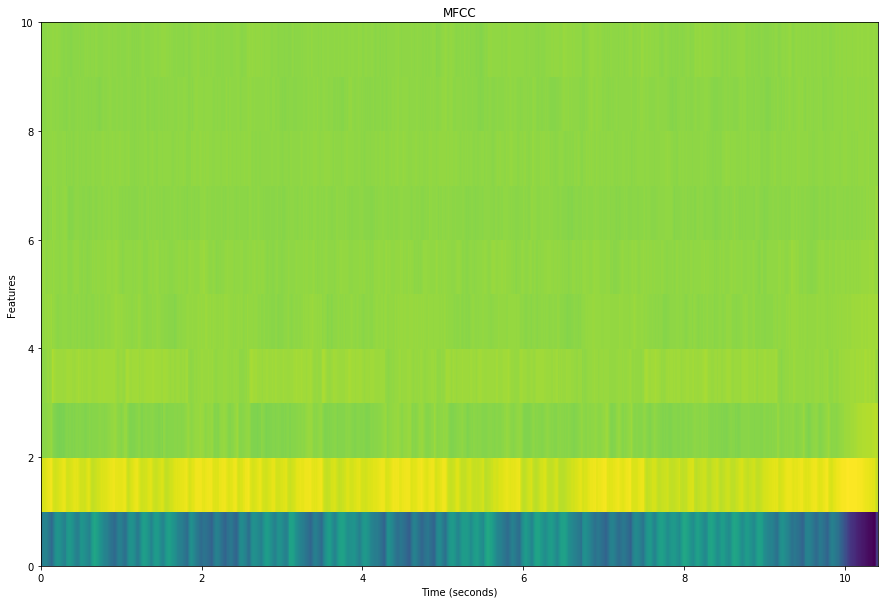

<Figure size 1080x720 with 0 Axes>

In [7]:
x, fs = librosa.load("audio/strings.aif")

# Plotting individual features
plot_features(x, fs, 1024)

# Plotting MFCCs
show_mfccs(x, fs, n_fft = 1024, n_mels = 40, n_mfccs = 10)
plt.tight_layout()

# Listening to the samples
Audio(data = x, rate = fs)

``
All three features reveal onsets fairly well. Spectral Centroid perhaps reveal more pitch information compared to others. 
``

``
RMS at certain points can reveal the accents of the notes. However, when the bass note is also intense, the accent is obfuscated by the lower notes. 
``

## action.aif

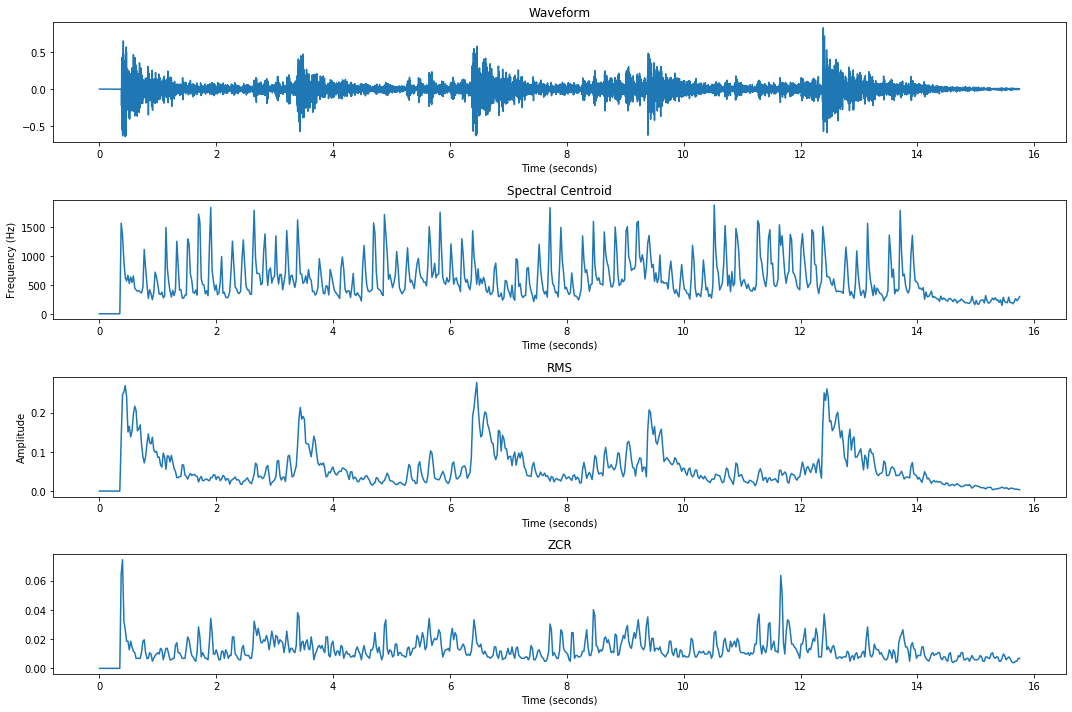

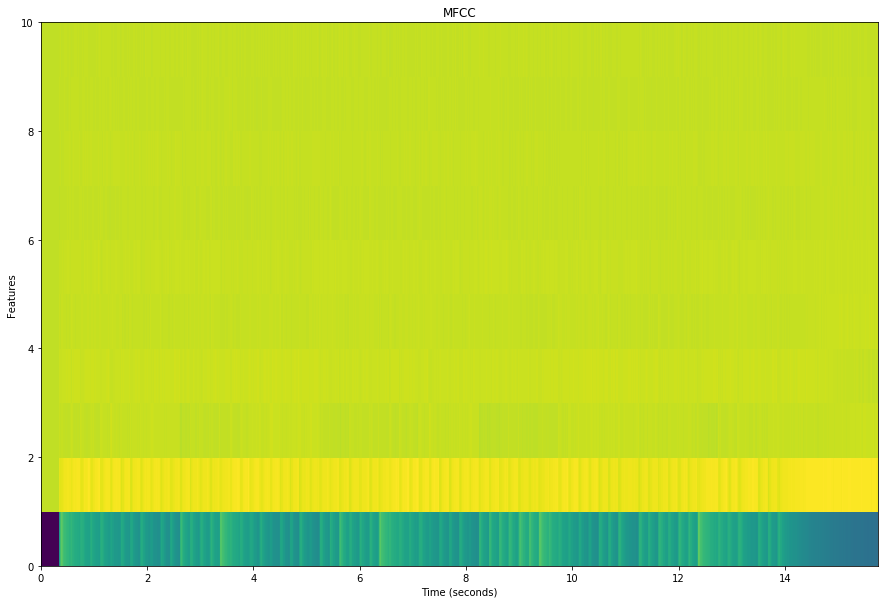

<Figure size 1080x720 with 0 Axes>

In [8]:
x, fs = librosa.load("audio/action.aif")

# Plotting individual features
plot_features(x, fs, 1024)

# Plotting MFCCs
show_mfccs(x, fs, n_fft = 1024, n_mels = 40, n_mfccs = 10)
plt.tight_layout()

# Listening to the samples
Audio(data = x, rate = fs)

``
Spectral Centroid reveals onsets very well, regardless of the intensity of individual hits. 
``

``
RMS, however, shoes both onsets and the relative intensity of drum hits very well. 
``

``
Bottom strip of MFCC reveal similar information as compared to RMS. 
``

## poem.aif

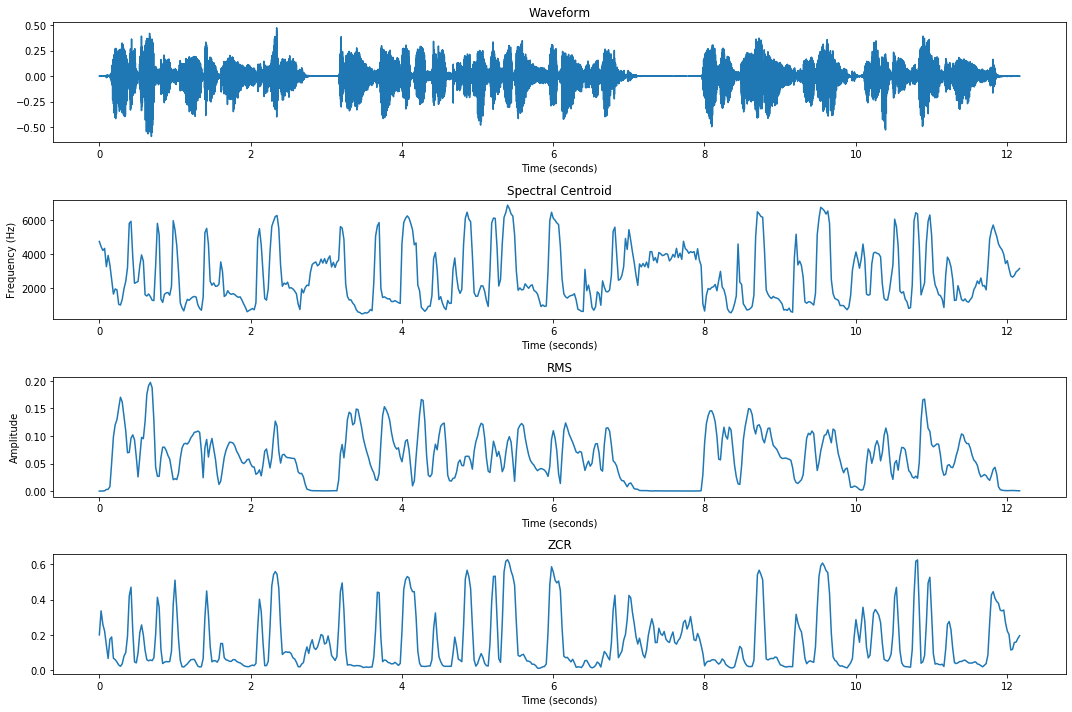

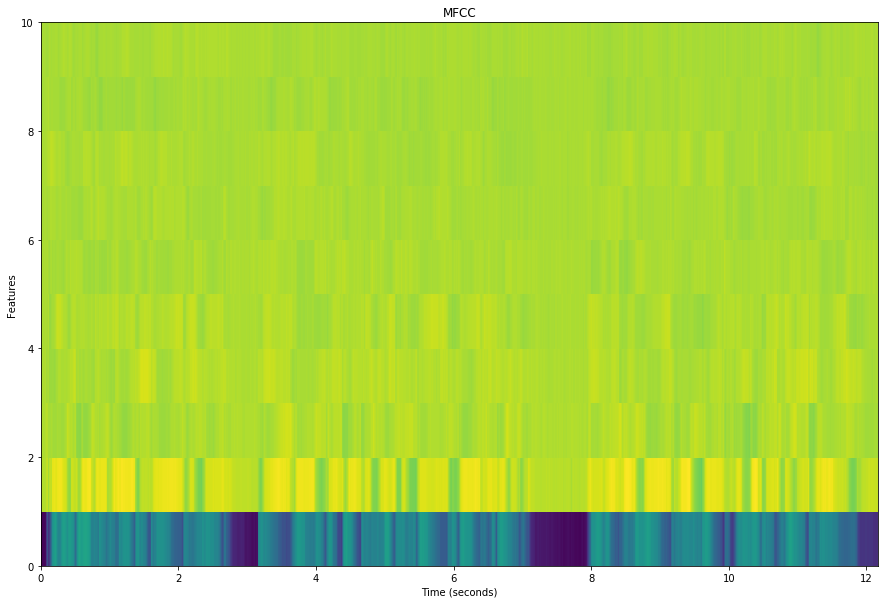

<Figure size 1080x720 with 0 Axes>

In [9]:
x, fs = librosa.load("audio/poem.aif")

# Plotting individual features
plot_features(x, fs, 1024)

# Plotting MFCCs
show_mfccs(x, fs, n_fft = 1024, n_mels = 40, n_mfccs = 10)
plt.tight_layout()

# Listening to the samples
Audio(data = x, rate = fs)

``
There's a lot of similarities between Spectral Centroid and ZCR. This is probably because of the high frequency contents in the consonents of speech that spikes both graphs. 
``

``
It looks like the MFCCs are revealing a lot of information in the upper rows, compared to other analysis. However, I can't make sense of them by looking.
``

## beethoven.aif

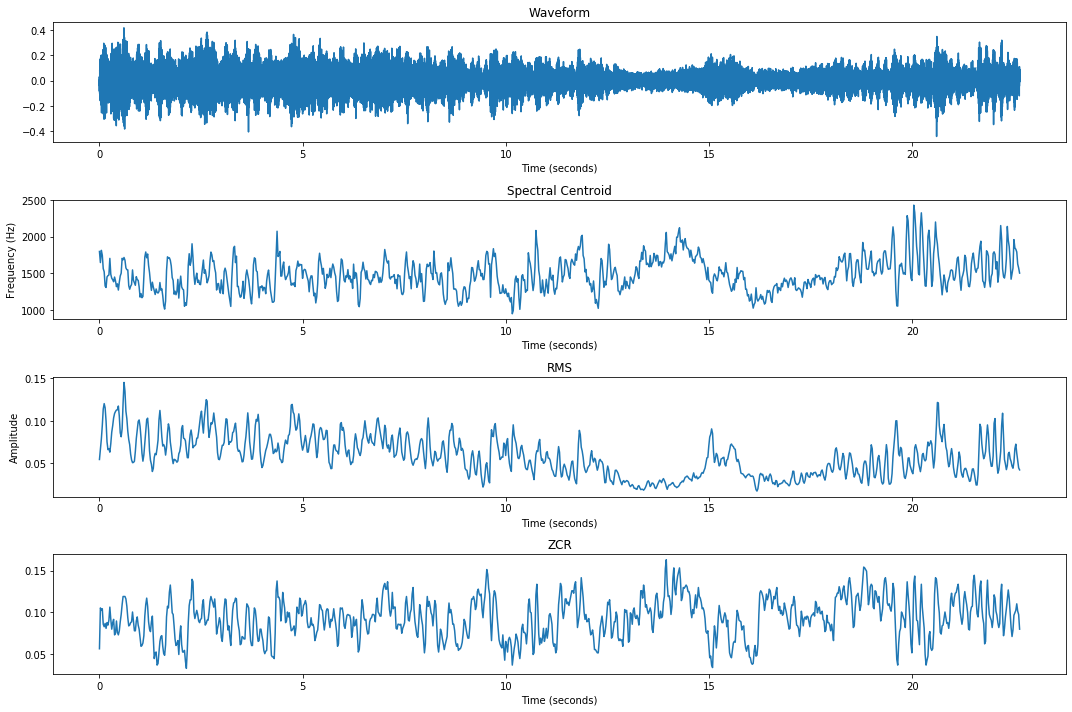

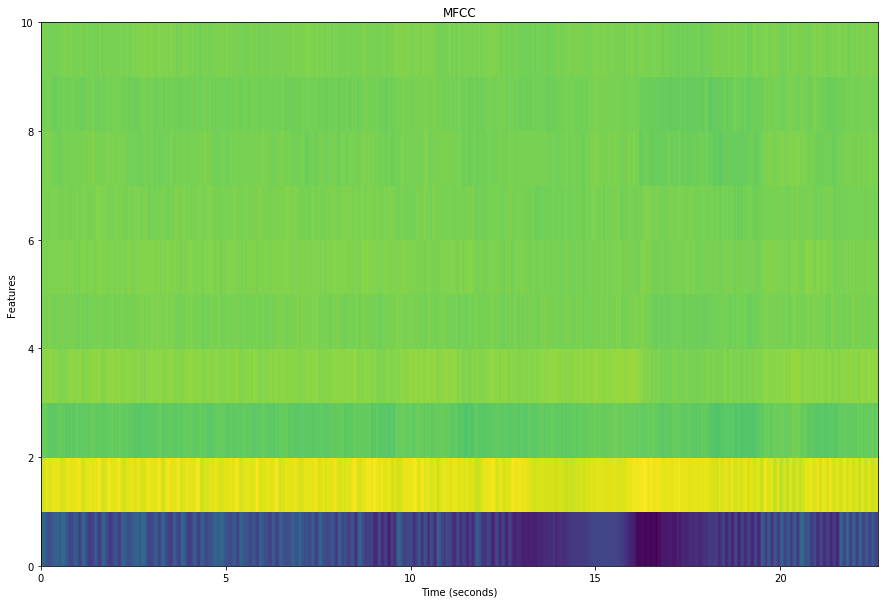

<Figure size 1080x720 with 0 Axes>

In [10]:
x, fs = librosa.load("audio/beethoven.wav")

# Plotting individual features
plot_features(x, fs, 1024)

# Plotting MFCCs
show_mfccs(x, fs, n_fft = 1024, n_mels = 40, n_mfccs = 10)
plt.tight_layout()

# Listening to the samples
Audio(data = x, rate = fs)

``
It looks like onsets are very well depicted in all of the plots. However, it's hard to analyze the clip by just looking at any of the plots. I think a regular spectrogram can probably be more useful here. 
``



## strauss.wav

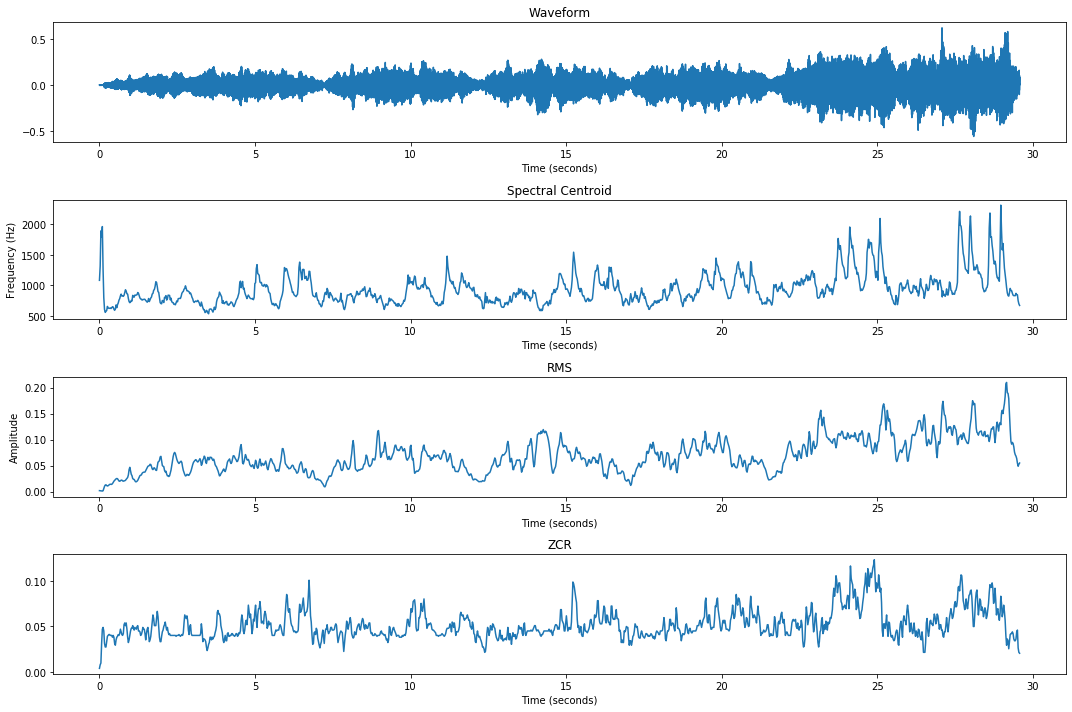

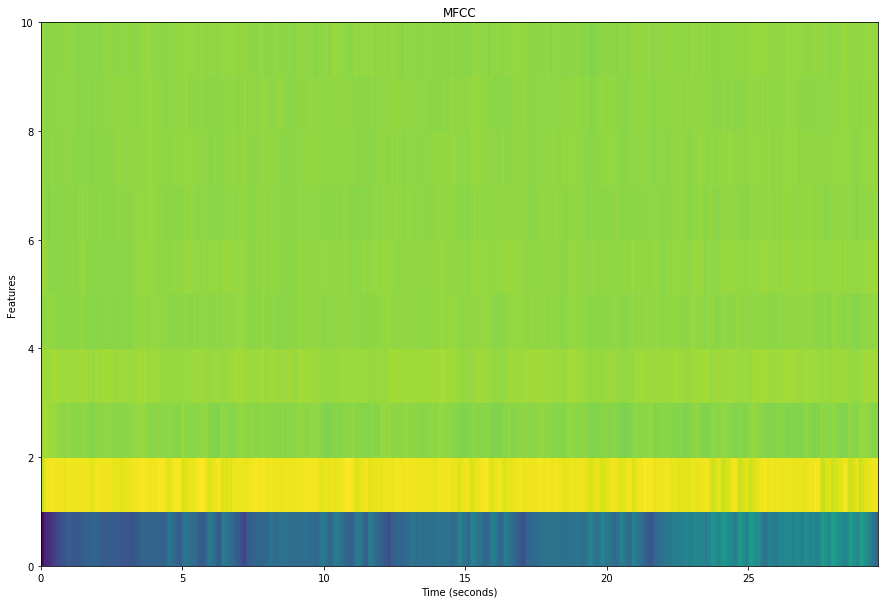

<Figure size 1080x720 with 0 Axes>

In [11]:
x, fs = librosa.load("audio/strauss.wav")

# Plotting individual features
plot_features(x, fs, 1024)

# Plotting MFCCs
show_mfccs(x, fs, n_fft = 1024, n_mels = 40, n_mfccs = 10)
plt.tight_layout()

# Listening to the samples
Audio(data = x, rate = fs)

``
Accented string sounds and their frequencies can be seen as sharp onset peaks in the Spectral Centroid plot. But similar to Beethoven, it's hard to analyze a symphony by just looking at these lower level features. 
``